In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
full_data = pd.read_csv(os.path.join('Github','prediction-evaluation-utils','data','nhefs.csv'))
full_data.drop(['seqn','yrdth','modth','dadth'], axis=1, inplace=True)
full_data.dropna(axis=1,inplace=True)
full_data.head()

,qsmk,death,sex,age,race,marital,school,education,ht,wt71,...,allergies,nerves,lackpep,hbpmed,boweltrouble,wtloss,infection,active,exercise,birthcontrol
0,0,0,0,42,1,2,7,1,174.1875,79.04,...,0,0,0,1,0,0,0,0,2,2
1,0,0,0,36,0,2,9,2,159.3750,58.63,...,0,0,0,0,0,0,1,0,0,2
2,0,0,1,56,1,3,11,2,168.5000,56.81,...,0,1,0,0,0,0,0,0,2,0
3,0,1,0,68,1,3,5,1,170.1875,59.42,...,0,0,0,0,0,0,0,1,2,2
4,0,0,0,40,0,2,11,2,181.8750,87.09,...,0,0,0,0,1,0,0,1,1,2


In [3]:
data_desc = pd.read_excel(os.path.join('Github','prediction-evaluation-utils','data','NHEFS_Codebook.xls'))
data_desc_dict = pd.Series(index=data_desc['Variable name'], data=data_desc['Description'].values).to_dict()
data_desc.head()

,Variable name,Description,Category
0,active,"IN YOUR USUAL DAY, HOW ACTIVE ARE YOU? IN 1971...",Lifestyle
1,age,AGE IN 1971,Base features
2,alcoholfreq,HOW OFTEN DO YOU DRINK? IN 1971 0: Almost ev...,Lifestyle
3,alcoholhowmuch,"WHEN YOU DRINK, HOW MUCH DO YOU DRINK? IN 1971",Lifestyle
4,alcoholpy,"HAVE YOU HAD 1 DRINK PAST YEAR? IN 1971, 1:EV...",Lifestyle


In [4]:
data_train, data_test = train_test_split(full_data, test_size=0.3)
print(f'Train: {data_train.shape}, Test: {data_test.shape}')\

X_train, y_train = data_train.loc[:, data_train.columns!='death'], data_train.loc[:, 'death']
X_test, y_test = data_test.loc[:, data_test.columns!='death'], data_test.loc[:, 'death']

Train: (1140, 44), Test: (489, 44)


In [5]:
clf = GradientBoostingClassifier(n_estimators=800, learning_rate=0.01,
    max_depth=3, random_state=0).fit(X_train, y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

print(f'Train AUC: {roc_auc_score(y_train,y_pred_train)}')
print(f'Test AUC: {roc_auc_score(y_test,y_pred_test)}')

Train AUC: 0.944046442687747
Test AUC: 0.8452163474085286


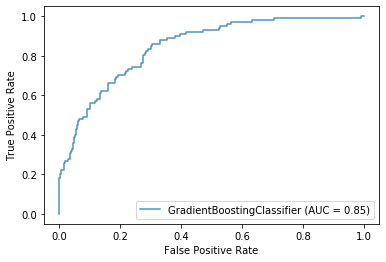

In [10]:
ax = plt.gca()
roc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)